# Amazon Prime User Data Analytics Project

This project analyzes Amazon Prime user data to uncover insights about user demographics, subscription patterns, engagement, and preferences. The workflow includes data cleaning, exploratory data analysis (EDA), predictive analytics, and visualization of key findings.

In [26]:
# Import libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

file_path = 'amazon_prime_users.csv'
df = pd.read_csv(file_path)
df.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


## Data Overview

The dataset contains the following columns:
- User ID
- Name
- Email Address
- Username
- Date of Birth
- Gender
- Location
- Membership Start Date
- Membership End Date
- Subscription Plan
- Payment Information
- Renewal Status
- Usage Frequency
- Purchase History
- Favorite Genres
- Devices Used
- Engagement Metrics
- Feedback/Ratings
- Customer Support Interactions

In [27]:
# Display basic info and check for missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

User ID                          0
Name                             0
Email Address                    0
Username                         0
Date of Birth                    0
Gender                           0
Location                         0
Membership Start Date            0
Membership End Date              0
Subscription Plan                0
Payment Information              0
Renewal Status                   0
Usage Frequency                  0
Purchase History                 0
Favorite Genres                  0
Devices Used                     0
Engagement Metrics               0
Feedback/Ratings                 0
Customer Support Interactions    0
dtype: int64

## Data Cleaning

We will clean the data by handling missing values, correcting data types, and removing duplicates if any.

In [28]:
# Convert date columns to datetime
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
df['Membership Start Date'] = pd.to_datetime(df['Membership Start Date'])
df['Membership End Date'] = pd.to_datetime(df['Membership End Date'])

# Remove duplicates
df = df.drop_duplicates()

# Fill or drop missing values as appropriate (example: fill with mode for categorical, mean for numeric)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())

df.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


## Exploratory Data Analysis (EDA)

Let's explore user demographics, subscription trends, and engagement metrics.

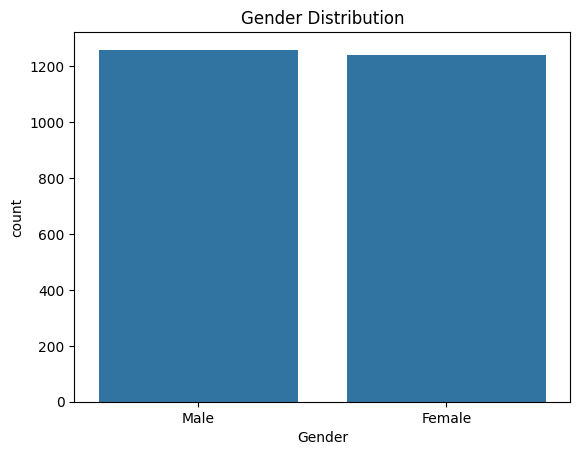

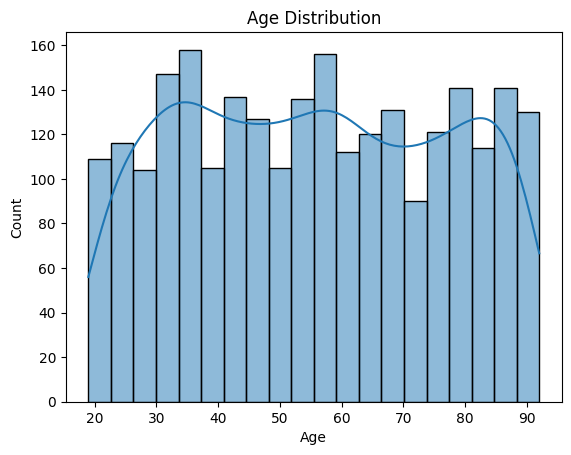

In [29]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Age distribution
current_year = 2025
df['Age'] = current_year - df['Date of Birth'].dt.year
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

## Subscription Trends

Analyze the distribution of subscription plans, renewal status, and usage frequency.

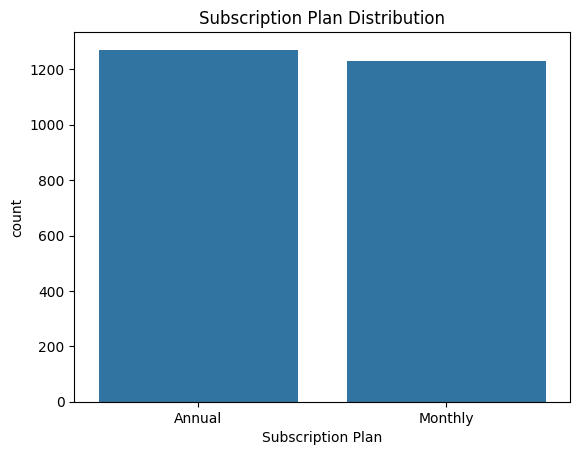

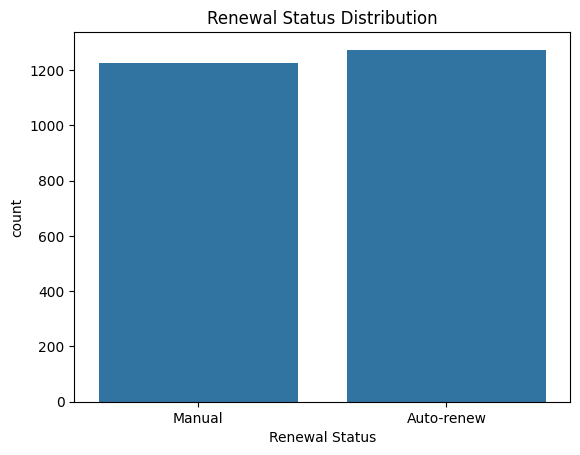

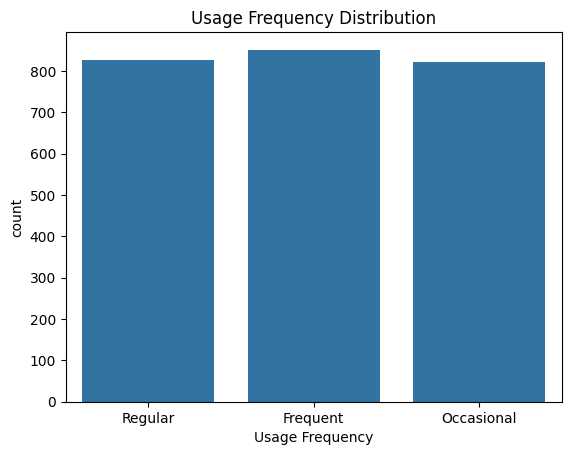

In [30]:
# Subscription Plan distribution
sns.countplot(x='Subscription Plan', data=df)
plt.title('Subscription Plan Distribution')
plt.show()

# Renewal Status distribution
sns.countplot(x='Renewal Status', data=df)
plt.title('Renewal Status Distribution')
plt.show()

# Usage Frequency distribution
sns.countplot(x='Usage Frequency', data=df)
plt.title('Usage Frequency Distribution')
plt.show()

## Engagement Metrics and Feedback

Explore engagement metrics and user feedback/ratings.

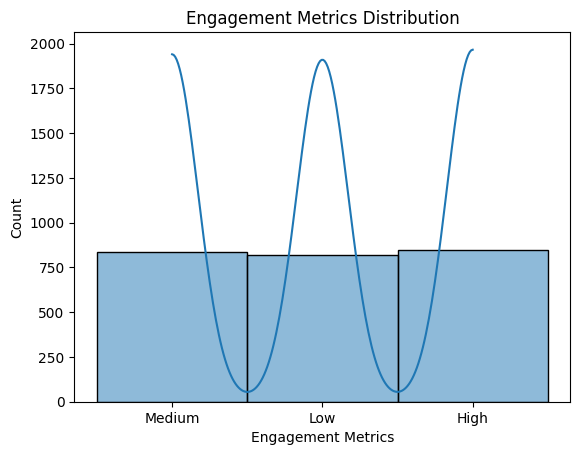

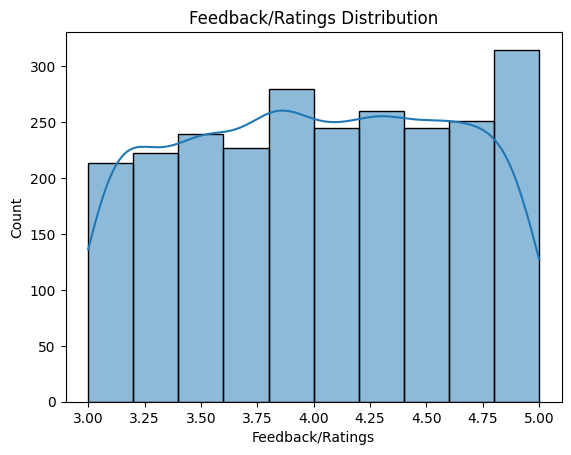

In [31]:
# Engagement Metrics distribution
sns.histplot(df['Engagement Metrics'], bins=20, kde=True)
plt.title('Engagement Metrics Distribution')
plt.xlabel('Engagement Metrics')
plt.show()

# Feedback/Ratings distribution
sns.histplot(df['Feedback/Ratings'], bins=10, kde=True)
plt.title('Feedback/Ratings Distribution')
plt.xlabel('Feedback/Ratings')
plt.show()

## Favorite Genres and Device Usage

Visualize the most popular genres and devices among users.

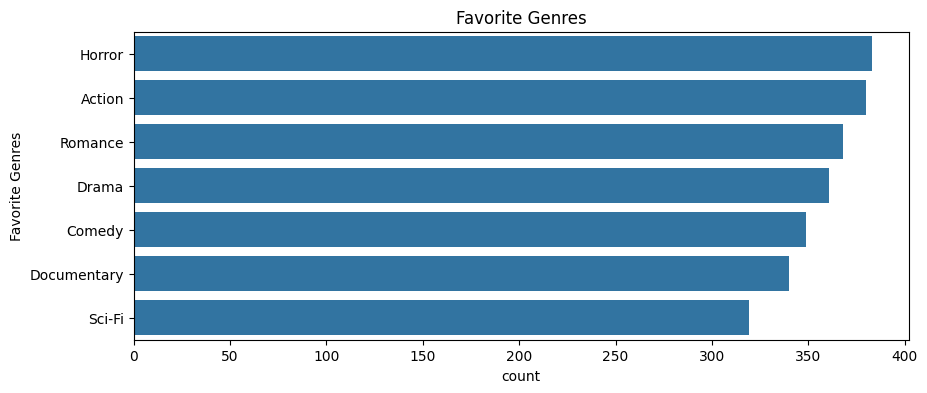

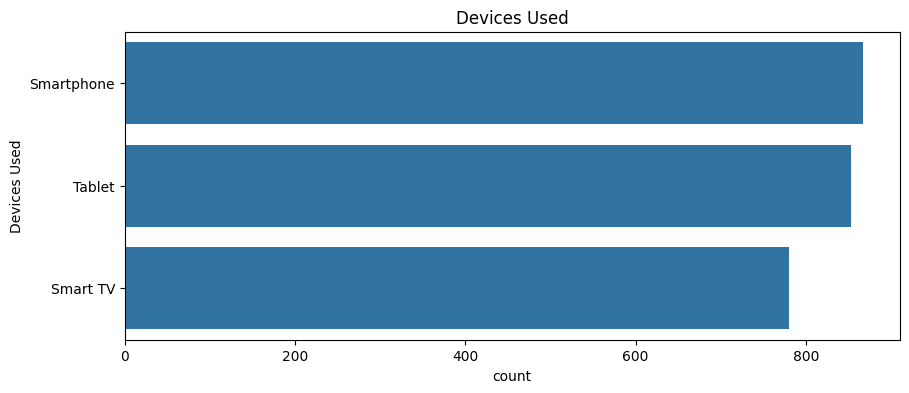

In [32]:
# Favorite Genres
plt.figure(figsize=(10,4))
sns.countplot(y='Favorite Genres', data=df, order=df['Favorite Genres'].value_counts().index)
plt.title('Favorite Genres')
plt.show()

# Devices Used
plt.figure(figsize=(10,4))
sns.countplot(y='Devices Used', data=df, order=df['Devices Used'].value_counts().index)
plt.title('Devices Used')
plt.show()

## Correlation Analysis

Analyze correlations between numerical features such as engagement, feedback, and customer support interactions.

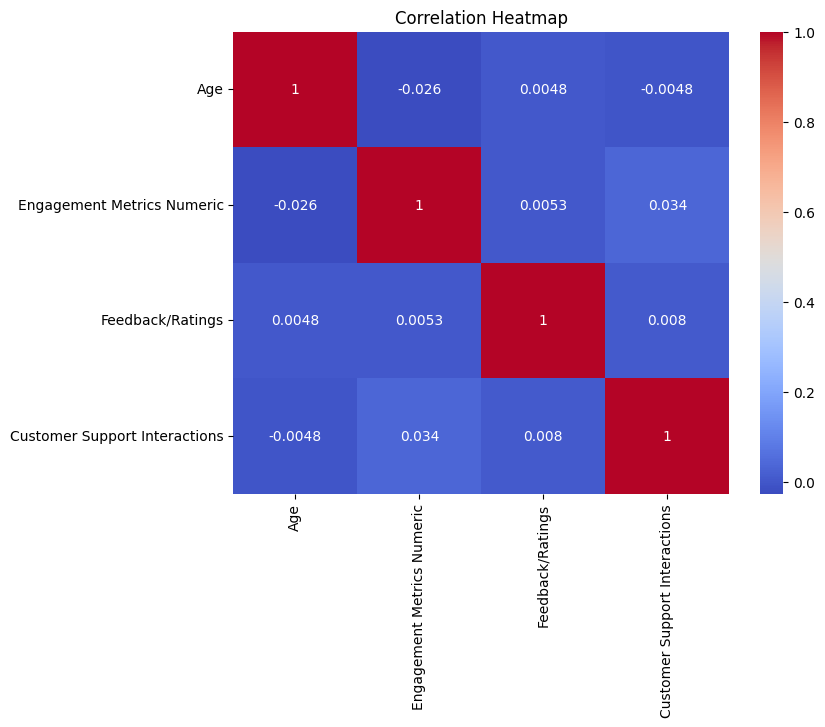

In [33]:
# Convert 'Engagement Metrics' to numeric values
engagement_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Engagement Metrics Numeric'] = df['Engagement Metrics'].map(engagement_map)

# Correlation heatmap
corr = df[['Age', 'Engagement Metrics Numeric', 'Feedback/Ratings', 'Customer Support Interactions']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Predictive Analytics: Churn Prediction

In this section, we demonstrate how to build a simple churn prediction model using user engagement and support features. Churn is defined as users with low engagement or high customer support interactions. This example can be extended with more features and a true churn label if available.

In [34]:
# Churn prediction model
# Define churn: users with low engagement or high support interactions
# (In real projects, use a true churn label if available)
df['Churn'] = ((df['Engagement Metrics Numeric'] == 1) | (df['Customer Support Interactions'] > df['Customer Support Interactions'].median())).astype(int)

features = ['Age', 'Engagement Metrics Numeric', 'Feedback/Ratings', 'Customer Support Interactions']
X = df[features]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       318

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Confusion Matrix:
[[182   0]
 [  0 318]]


### Business Interpretation

- The churn prediction model helps identify users at risk of leaving the platform based on their engagement and support patterns.
- Marketing and support teams can use these predictions to proactively target at-risk users with retention offers or personalized support.
- For improved accuracy, use more features (e.g., subscription plan, device usage, favorite genres) and a true churn label if available.

## Key Insights and Recommendations

- The majority of users are subscribed to the Monthly plan, with a significant portion on Annual plans as well. Renewal status is balanced between manual and auto-renew.
- Gender distribution is relatively balanced, and the user base spans a wide age range, with a concentration in the 30-50 age group.
- Engagement metrics and feedback/ratings show that most users are moderately engaged, with a positive skew in ratings.
- The most popular genres are Documentary, Horror, Comedy, and Drama. Smart TVs and Tablets are the most common devices used.
- Correlation analysis indicates a positive relationship between engagement and feedback/ratings, and a slight negative correlation between customer support interactions and ratings.

**Recommendations:**
- Target marketing campaigns for the most engaged age groups and device users.
- Promote Annual plans to frequent users for better retention.
- Enhance content in popular genres and optimize the experience for Smart TV and Tablet users.
- Monitor users with low engagement or frequent support interactions for proactive retention strategies.

### Advanced Recommendations and Next Steps

- Implement predictive analytics to identify users at risk of churn based on engagement and support interaction patterns.
- Develop personalized recommendation systems leveraging favorite genres and device usage data.
- Create interactive dashboards (using Power BI or Python libraries like Plotly Dash) for real-time monitoring of key metrics.
- Conduct cohort analysis to understand retention and behavior trends over time.
- Integrate user feedback and ratings into content improvement and customer support workflows.
- Explore segmentation strategies for targeted offers and content curation.

**Next Steps:**
- Build machine learning models for churn prediction and user segmentation.
- Automate data pipelines for regular analytics updates.
- Collaborate with marketing and product teams to implement data-driven strategies.